In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('quality.csv')
df

,S.No.,num_words,num_characters,num_misspelled,bin_end_qmark,num_interrogative,bin_start_small,num_sentences,num_punctuations,label
0,1,10,48,2,0,0,0,2,4,B
1,2,8,25,0,0,0,1,1,0,B
2,3,20,81,0,1,19,0,1,1,B
3,4,9,34,1,0,1,0,1,2,B
4,5,18,69,3,0,1,0,1,0,B
5,6,7,39,1,0,0,0,1,2,B
6,7,10,46,4,0,2,1,2,2,B
7,8,14,70,5,0,0,0,2,16,B
8,9,0,46,0,0,0,0,1,0,B
9,10,31,173,26,0,0,1,3,7,B


In [ ]:
X = df[['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark', 'num_interrogative', 'bin_start_small',
      'num_sentences', 'num_punctuations']]
df['label'] = df['label'].replace({'B': 0, 'G': 1})
y = df[['label']]
df

,S.No.,num_words,num_characters,num_misspelled,bin_end_qmark,num_interrogative,bin_start_small,num_sentences,num_punctuations,label
0,1,10,48,2,0,0,0,2,4,0
1,2,8,25,0,0,0,1,1,0,0
2,3,20,81,0,1,19,0,1,1,0
3,4,9,34,1,0,1,0,1,2,0
4,5,18,69,3,0,1,0,1,0,0
5,6,7,39,1,0,0,0,1,2,0
6,7,10,46,4,0,2,1,2,2,0
7,8,14,70,5,0,0,0,2,16,0
8,9,0,46,0,0,0,0,1,0,0
9,10,31,173,26,0,0,1,3,7,0


In [ ]:
X = pd.concat((pd.DataFrame([1,2]*28),df[['num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark', 'num_interrogative', 'bin_start_small',
      'num_sentences', 'num_punctuations']]),axis=1, join='inner').to_numpy()
y = y.to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
logmodel = sm.Logit(y_train, X_train).fit(disp=True)
print(logmodel.summary())

Optimization terminated successfully.
         Current function value: 0.352070
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   19
Model:                          Logit   Df Residuals:                       10
Method:                           MLE   Df Model:                            8
Date:                Fri, 19 Jan 2024   Pseudo R-squ.:                  0.4827
Time:                        07:11:44   Log-Likelihood:                -6.6893
converged:                       True   LL-Null:                       -12.932
Covariance Type:            nonrobust   LLR p-value:                    0.1308
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0960      0.938     -0.102      0.919      -1.934       1.742
x2             0.2094      0.

In [ ]:
predictions = logmodel.predict(X_test)
class_prediction = [1 if x>=0.5 else 0 for x in predictions]

In [ ]:
predictions

array([0.74451727, 0.98054131, 0.06441659, 0.31870749, 0.34216635,
       0.99986554, 0.83417788, 0.09142223, 0.84015102])

In [ ]:
class_prediction

[1, 1, 0, 0, 0, 1, 1, 0, 1]

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test, class_prediction))
print(confusion_matrix(y_test, class_prediction))

0.6666666666666666
[[2 1]
 [2 4]]


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)

Text(0, 0.5, 'TP rate')

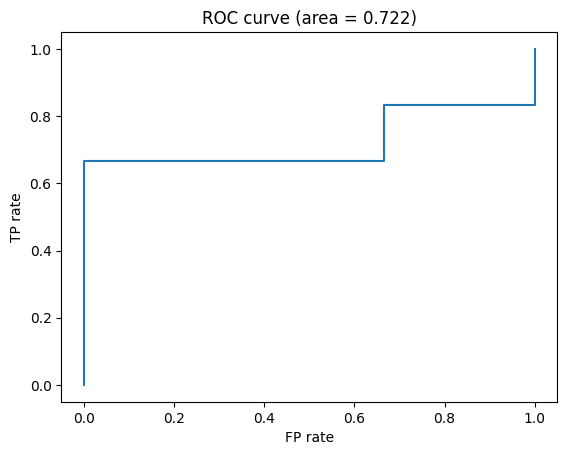

In [ ]:
plt.plot(fpr, tpr, label='ROC Curve (area = %0.3f)' %roc_auc)
plt.title('ROC curve (area = %0.3f)' %roc_auc)
plt.xlabel('FP rate')
plt.ylabel('TP rate')